In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

%matplotlib inline
#Try changing things, try looking at the model output, and try comparing output from different times.
#In the 2018 files you have the years 2015-2018
#There is this star thing that people use in terminal (*) That is useful for finding files and you should try and find that.

In [2]:
x=np.arange(0,10) # create a numpy array containing the numbers 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print('x:',x)
y=x[4:8]  # put the 4-indexed (4) through 7-indexed (7) elements in y
print('y:',y)
print('last element:', x[-1]) #something again
print('all of x:',x[:])

x: [0 1 2 3 4 5 6 7 8 9]
y: [4 5 6 7]
last element: 9
all of x: [0 1 2 3 4 5 6 7 8 9]


In [3]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

This give the locations of S3 (Is this an observation spot)?

### Load a file from the 201812 hindcast

You can just choose a different day if you want a different example

In [4]:
f=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr16/SalishSea_1h_20160401_20160401_ptrc_T.nc')

In [5]:
f2=nc.Dataset('/results/SalishSea/nowcast-green.201812/04feb19/SalishSea_1h_20190204_20190204_ptrc_T.nc')

In [6]:
print(f.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [7]:
fe3t=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr15/SalishSea_1h_20150401_20150401_carp_T.nc')

In [8]:
fe3t_2=nc.Dataset('/results/SalishSea/nowcast-green.201812/25feb15/SalishSea_1h_20150225_20150225_carp_T.nc')

In [9]:
print(fe3t.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PAR', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'sigma_theta', 'e3t', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen'])


In [10]:
# return times as datetime objects:
torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00


In [11]:
times[0:3]

array([datetime.datetime(2016, 4, 1, 0, 30),
       datetime.datetime(2016, 4, 1, 1, 30),
       datetime.datetime(2016, 4, 1, 2, 30)], dtype=object)

In [12]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


Time, depth, Y, X is the set up of the 2d array. 

### Depth Profile

Text(0.5, 0, 'Concentration ($\\mu$M)')

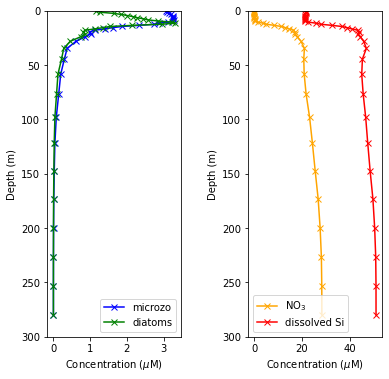

In [13]:
fig,ax=plt.subplots(1,2,figsize=(6,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
il=12 # hour
# use location 'S3':
ij,ii=places.PLACES['S3']['NEMO grid ji'] #getting the exact location.
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['microzooplankton'][il,:,ij,ii]),f.variables['deptht'][:],'b-x',label='microzo') #np.mask hides things we do not want such as the values of land in the model. 
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['diatoms'][il,:,ij,ii]),f.variables['deptht'][:],'g-x',label='diatoms')
ax[0].set_ylim(300,0)
ax[0].legend()
ax[0].set_xlabel('Concentration ($\mu$M)')
ax[0].set_ylabel('Depth (m)')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['nitrate'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='orange',label='NO$_3$')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['silicon'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='r',label='dissolved Si')
ax[1].set_ylim(300,0)
ax[1].set_ylabel('Depth (m)')
ax[1].legend()
ax[1].set_xlabel('Concentration ($\mu$M)')

In [14]:
np.shape(tmask)

(1, 40, 898, 398)

In [15]:
# mask example
amask=np.array([1,1,1,0,0])
amarray=np.array([6,5,4,3,2])
print(amask)
print(amarray)
print(np.ma.masked_where(amask,amarray))
#It also masks anything that says True, so we actually changed 
#it so that it returns true when equal to zero.
#ij and ii found the location we wanted.

[1 1 1 0 0]
[6 5 4 3 2]
[-- -- -- 3 2]


### Surface, Integrated plots - Aerial view

/home/kflanaga/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
<ipython-input-16-bb33abea5562>:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')


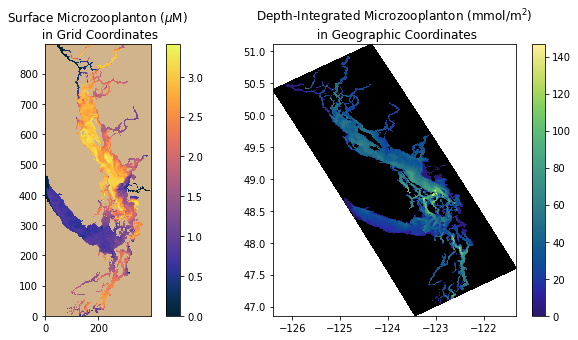

In [16]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')# sets the color of all the masked stuff, so the land.
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)# takes an output from a 2d grid and then gives everything a color.
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['microzooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz=intuz/np.sum(fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('Depth-Integrated Microzooplanton (mmol/m$^2$) \n in Geographic Coordinates');
fig.colorbar(m1,ax=ax[1])

<ipython-input-17-389f5ac15e4e>:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')


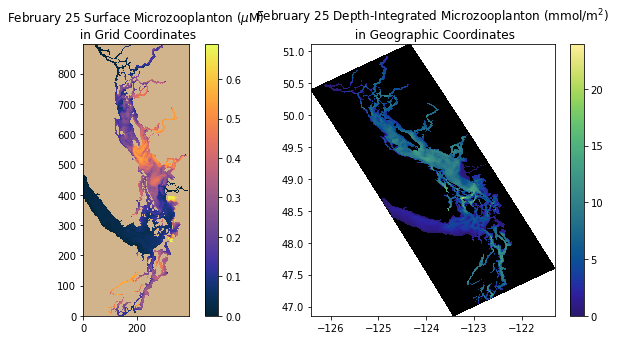

In [17]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f2.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('February 25 Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f2.variables['microzooplankton'][il,:,:,:]*fe3t_2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz=intuz/np.sum(fe3t_2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('February 25 Depth-Integrated Microzooplanton (mmol/m$^2$) \n in Geographic Coordinates');
fig.colorbar(m1,ax=ax[1])

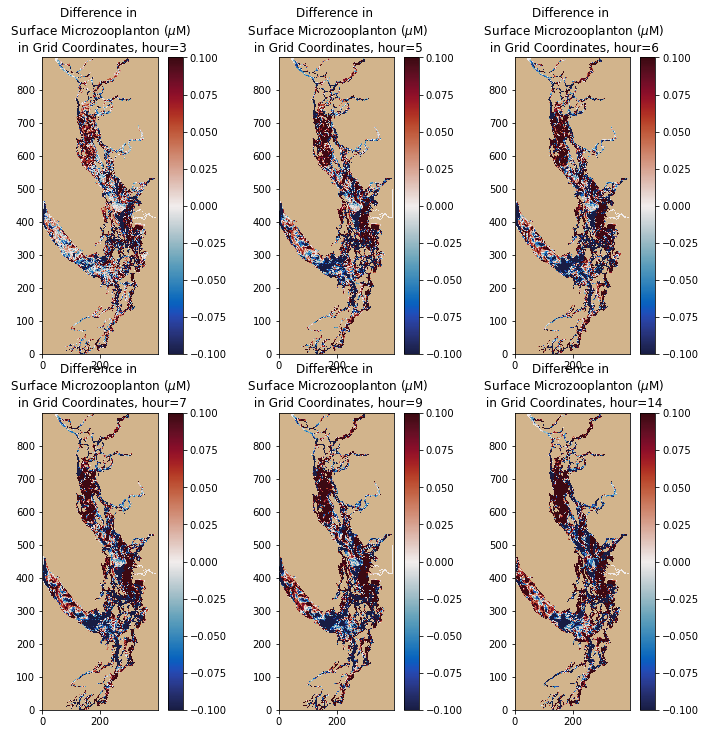

In [18]:
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')
fig,ax=plt.subplots(2,3,figsize=(12,12))
ax=ax.flatten()
tlist=[3,5,6,7,9,14]
for ii,il in enumerate(tlist):
    m0=ax[ii].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,
                    f.variables['microzooplankton'][il,0,:,:]-f.variables['microzooplankton'][0,0,:,:]),cmap=cmap0,
                        vmin=-.1,vmax=.1)
    viz_tools.set_aspect(ax[ii],coords='grid')
    ax[ii].set_title('Difference in \n Surface Microzooplanton ($\mu$M) \n in Grid Coordinates, hour='+str(il))
    fig.colorbar(m0,ax=ax[ii])

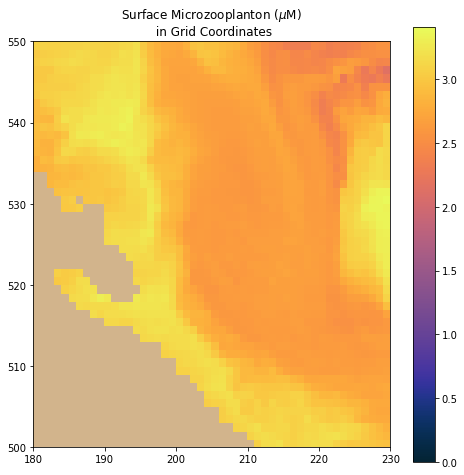

In [19]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap1=cmocean.cm.haline
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

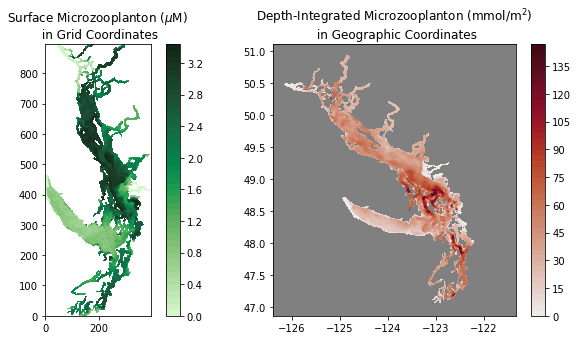

In [20]:
# with contourf: smoothing, but creates a smaller file
cmap0=cmocean.cm.algae
cmap1=cmocean.cm.amp
cmap1.set_bad('k') # does nothing here
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['microzooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:],0)
m1=ax[1].contourf(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,levels=50)#higher levels gives higher resolution and detail. more like pecolor
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('Depth-Integrated Microzooplanton (mmol/m$^2$) \n in Geographic Coordinates');
ax[1].set_facecolor('gray')
fig.colorbar(m1,ax=ax[1])

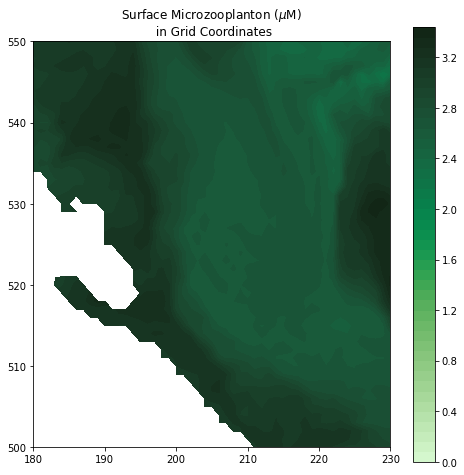

In [21]:
# with contourf: smoothing, but creates a smaller file
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

### Thalweg plot
  method using contour_thalweg from visualisations.py in tools repo

In [22]:
#open bathy file and meshmask
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

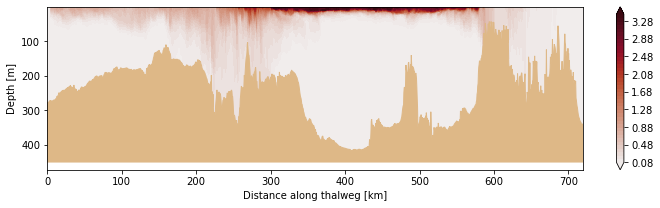

In [23]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
cb=visualisations.contour_thalweg(ax,f.variables['microzooplankton'][il,...],fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)


In [24]:
fbathy.close()
fmesh.close()

In [25]:
f.close()
fe3t.close()

In [26]:
f2.close()

You should always close all of your files whe you are done.